In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

In [2]:
# Read the csv data
flight_data = pd.read_excel('Flight_Data_Train.xlsx')
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# Convert All destination city names called "New Delhi" into "Delhi"
def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
flight_data['Destination'] = flight_data['Destination'].apply(newd)

In [5]:
# Extract the day and time seperately from the "Date_of_Journey" column
flight_data['Day_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'],format='%d/%m/%Y').dt.day

flight_data['Month_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [6]:
# Drop the "Date_of_Journey" column and print first 5 rows in new dataset
flight_data.drop('Date_of_Journey',inplace=True,axis=1)

flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [7]:
# Extract the hour and minute seperately from the "Dep_Time" column and Drop the "Dep_Time" column
flight_data['Hour_of_Departure'] = pd.to_datetime(flight_data['Dep_Time']).dt.hour
flight_data['Minute_of_Departure'] = pd.to_datetime(flight_data['Dep_Time']).dt.minute
flight_data.drop('Dep_Time',axis=1,inplace=True)

# Extract the hour and minute seperately from the "Arrival_Time" column and Drop the "Arrival_Time" column
flight_data['Hour_of_Arrival'] = pd.to_datetime(flight_data['Arrival_Time']).dt.hour
flight_data['Minute_of_Arrival'] = pd.to_datetime(flight_data['Arrival_Time']).dt.minute
flight_data.drop('Arrival_Time',axis=1,inplace=True)

# print first 5 rows in new dataset
flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [8]:
# Extract the hours and minutes from the "Duration" column and Drop the "Duration" column
flightduration = list(flight_data['Duration'])
for x in range(len(flightduration)):
    if len(flightduration[x].split()) != 2:
        if 'h' in flightduration[x]:
            flightduration[x] = flightduration[x] + ' 0m'
        else:
            flightduration[x] = '0h ' + flightduration[x]
            
duration_hour = []
duration_min = []

for x in flightduration:
    h,m = x.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))
    
flight_data['Hours_of_Duration'] = duration_hour
flight_data['Mints_of_Duration'] = duration_min
flight_data.drop('Duration',axis=1,inplace=True)
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [9]:
flight_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [10]:
# Creating dummy columns for the Airline column.
airline_services = pd.get_dummies(flight_data[['Airline']])

airline_services.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
flight_data["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [12]:
# Creating dummy columns for the Source Airports column.
source_airports = pd.get_dummies(flight_data[['Source']])

source_airports.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [13]:
flight_data["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [14]:
# Creating dummy columns for Destination column.
destination_airports = pd.get_dummies(flight_data[['Destination']])
destination_airports.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [15]:
flight_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [16]:
def give_numerical_values_to_totalStops(stops):
    if stops=='non-stop':
        return 0
    elif stops=='1 stop':
        return 1
    elif stops=='2 stops':
        return 2
    elif stops=='3 stops':
        return 3
    elif stops=='4 stops':
        return 4
    
flight_data['Total_Stops'] = flight_data['Total_Stops'].apply(give_numerical_values_to_totalStops)

# Convert data type of Total_Stops from float to integer

flight_data['Total_Stops'] = flight_data['Total_Stops'].fillna(0).astype(np.int64)
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [17]:
# Drop unnecessary Columns
flight_data.drop(['Route','Additional_Info'],inplace=True,axis=1)
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


In [18]:
#Concatenate dataframe --> flight_data + Airline + Source + Destination

flight_data2 = pd.concat([flight_data, airline_services,source_airports, destination_airports],axis=1)
flight_data2.drop(['Airline','Source','Destination'],axis=1,inplace=True)
flight_data2.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,1,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,1,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,1,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,1,0,0,0,0,0,0,1,0,0


In [19]:
flight_data2.shape

(10683, 32)

## Test Dataset ##

In [20]:
flight_data_test = pd.read_excel("Flight_Data_Test.xlsx")
flight_data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Data Preprocessing ###

In [21]:
print("---------------Test data Info----------------")
print(flight_data_test.info())

print()

print("--------------Null values :--------------")
flight_data_test.dropna(inplace = True)
print(flight_data_test.isnull().sum())

---------------Test data Info----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None

--------------Null values :--------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype:

In [22]:
# Convert All destination city names called "New Delhi" into "Delhi"
def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
flight_data_test['Destination'] = flight_data_test['Destination'].apply(newd)

# Date_of_Journey
flight_data_test["Day_of_Journey"] = pd.to_datetime(flight_data_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
flight_data_test["Month_of_Journey"] = pd.to_datetime(flight_data_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
flight_data_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
flight_data_test["Hour_of_Departure"] = pd.to_datetime(flight_data_test["Dep_Time"]).dt.hour
flight_data_test["Minute_of_Departure"] = pd.to_datetime(flight_data_test["Dep_Time"]).dt.minute
flight_data_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
flight_data_test["Hour_of_Arrival"] = pd.to_datetime(flight_data_test.Arrival_Time).dt.hour
flight_data_test["Minute_of_Arrival"] = pd.to_datetime(flight_data_test.Arrival_Time).dt.minute
flight_data_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
flight_duration = list(flight_data_test['Duration'])
for x in range(len(flight_duration)):
    if len(flight_duration[x].split()) != 2:
        if 'h' in flight_duration[x]:
            flight_duration[x] = flight_duration[x] + ' 0m'
        else:
            flight_duration[x] = '0h ' + flight_duration[x]
            
duration_hours = []
duration_mins = []

for x in flight_duration:
    h,m = x.split()
    duration_hours.append(int(h[:-1]))
    duration_mins.append(int(m[:-1]))
    
flight_data_test['Hours_of_Duration'] = duration_hours
flight_data_test['Mints_of_Duration'] = duration_mins
flight_data_test.drop('Duration',axis=1,inplace=True)

In [23]:
# Categorical data

print("------------Airline-----------")
print(flight_data_test["Airline"].value_counts())
airline_services = pd.get_dummies(flight_data_test[["Airline"]], drop_first= True)

print()

print("-----------Source-----------")
print(flight_data_test["Source"].value_counts())
source_airports = pd.get_dummies(flight_data_test[["Source"]], drop_first= True)

print()

print("-----------Destination-----------")
print(flight_data_test["Destination"].value_counts())
destination_airports = pd.get_dummies(flight_data_test[["Destination"]], drop_first = True)

------------Airline-----------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

-----------Source-----------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

-----------Destination-----------
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [24]:
# Replacing Total_Stops
def give_numerical_values_to_totalStops(stops):
    if stops=='non-stop':
        return 0
    elif stops=='1 stop':
        return 1
    elif stops=='2 stops':
        return 2
    elif stops=='3 stops':
        return 3
    elif stops=='4 stops':
        return 4
    
flight_data_test['Total_Stops'] = flight_data_test['Total_Stops'].apply(give_numerical_values_to_totalStops)


In [25]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
flight_data_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [26]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
flight_data3 = pd.concat([flight_data_test, airline_services, source_airports, destination_airports], axis = 1)

flight_data3.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print("Shape of test data : ", flight_data3.shape)

flight_data3.head()

Shape of test data :  (2671, 27)


,Total_Stops,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,6,6,17,30,4,25,10,55,0,...,0,0,0,1,0,0,1,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,0,1,0,0,1,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,1,0,0


#### Feature Selection ####

In [27]:
flight_data2.shape

(10683, 32)

In [28]:
flight_data2.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Hour_of_Departure', 'Minute_of_Departure', 'Hour_of_Arrival',
       'Minute_of_Arrival', 'Hours_of_Duration', 'Mints_of_Duration',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [29]:
X = flight_data2[['Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Hour_of_Departure', 'Minute_of_Departure', 'Hour_of_Arrival',
       'Minute_of_Arrival', 'Hours_of_Duration', 'Mints_of_Duration',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
X.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Hours_of_Duration,Mints_of_Duration,Airline_Air Asia,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,1,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,0,...,0,0,0,1,0,1,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,1,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,1,0,0,0,0,0,0,1,0,0


In [30]:
y=flight_data2['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

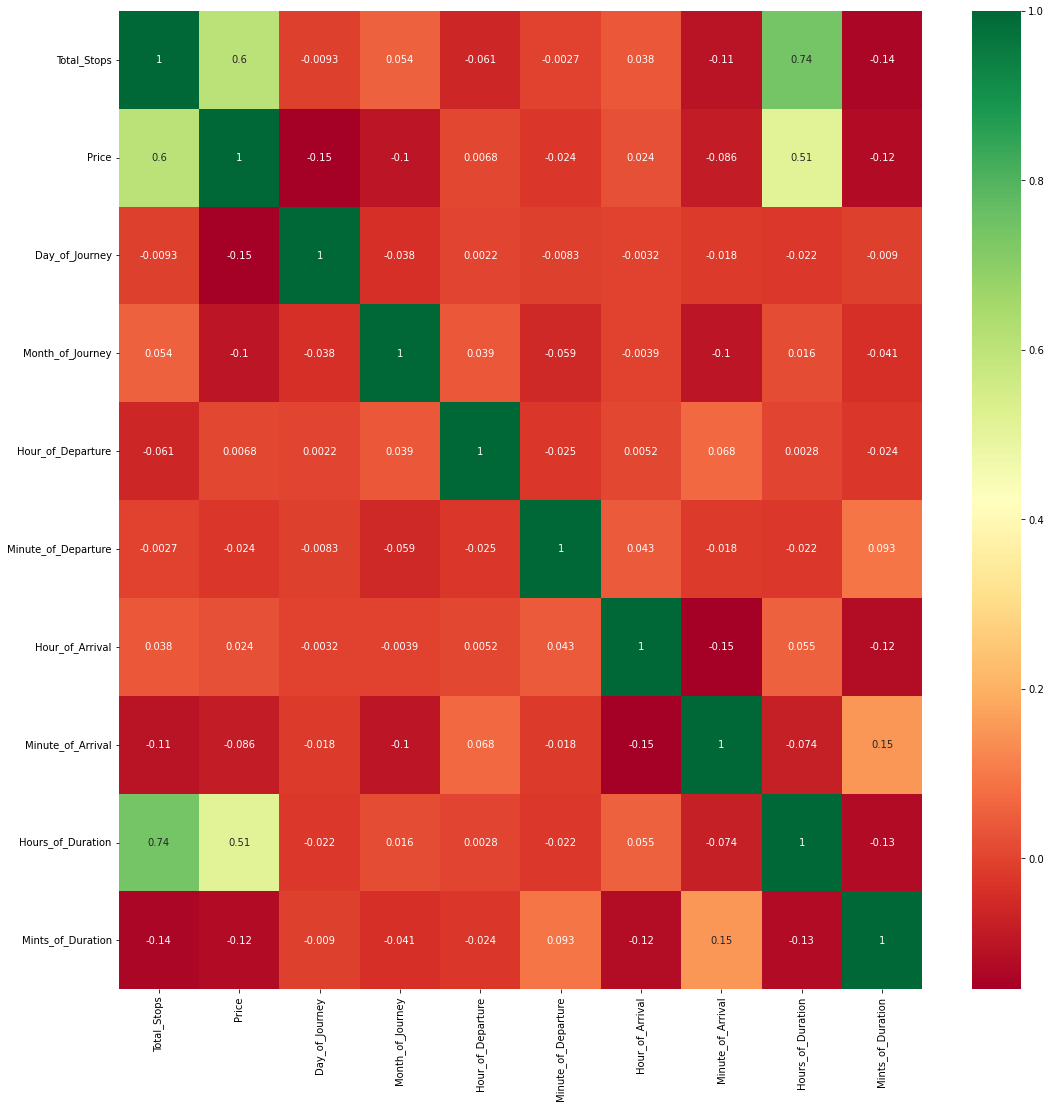

In [31]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(flight_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [32]:
# Important feature using ExtraTreesRegressor to fits a number of randomized decision trees

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [33]:
print(selection.feature_importances_)

[2.32655732e-01 1.43182409e-01 5.85678671e-02 2.34290905e-02
 2.16978139e-02 2.79423834e-02 1.93529961e-02 1.33036205e-01
 1.74679638e-02 2.33169257e-03 8.25045092e-03 1.93271682e-03
 1.76816824e-02 1.34497229e-01 6.72550302e-02 1.76940710e-02
 7.97419124e-04 5.33464568e-03 9.93898474e-05 4.40962892e-03
 7.70241319e-05 1.03514310e-02 6.87372200e-04 7.27807735e-03
 2.39376306e-03 8.98622442e-03 2.90364367e-03 1.18075622e-02
 9.03836167e-03 8.17970698e-03 6.80417059e-04]


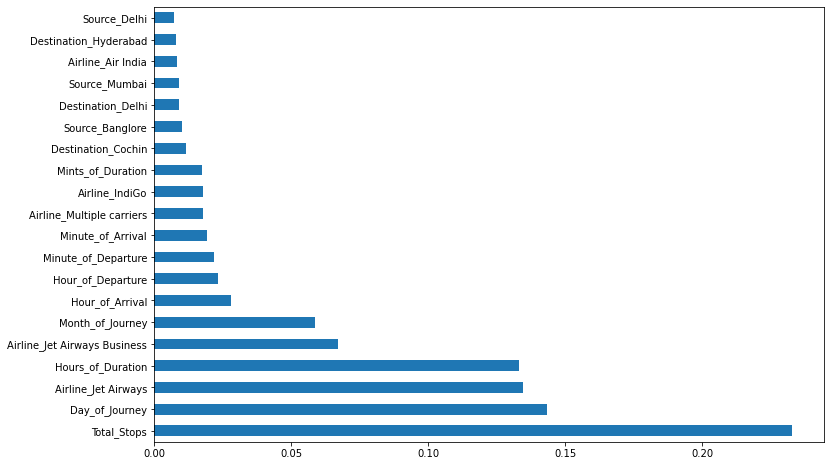

In [34]:
#Graph vizualization of feature importances

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Random Forest - Fitting the model ###

In [35]:
# Split dataset into train and test set in order to prediction 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
# Import model and Fit the data 

randomforest_reg = RandomForestRegressor()
randomforest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
randomforest_reg.score(X_test,y_test)

0.7827203824270708

In [38]:
prediction_data = randomforest_reg.predict(X_test)

C:\Users\MSI BRAVO 15\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

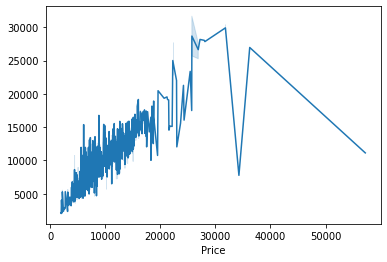

In [39]:
fig1=sns.lineplot(y_test, prediction_data)
fig1

C:\Users\MSI BRAVO 15\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

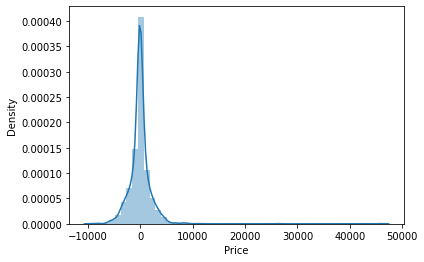

In [40]:
fig2=sns.distplot(y_test - prediction_data)
fig2

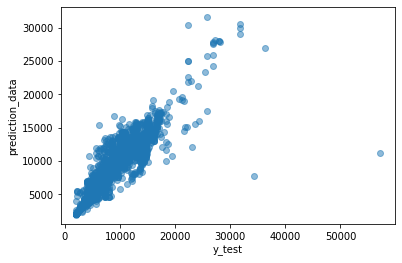

In [41]:
plt.scatter(y_test, prediction_data, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("prediction_data")
plt.show()

In [42]:
print('R2 score: ', metrics.r2_score(y_test,prediction_data))
print('Mean Absolute Error score:', metrics.mean_absolute_error(y_test, prediction_data))
print('Mean Squared Error score:', metrics.mean_squared_error(y_test, prediction_data))
print('Root Mean Squared Error score:', np.sqrt(metrics.mean_squared_error(y_test, prediction_data)))

errors = abs(prediction_data - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

R2 score:  0.7827203824270708
Mean Absolute Error score: 1205.4387685692745
Mean Squared Error score: 4598498.450904619
Root Mean Squared Error score: 2144.4109799440544
Accuracy: 86.72 %.


## Hyperparameter Tuning ## 

In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
randomf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [44]:
# Random search of parameters, using 5 fold cross validation, 
random_search = RandomizedSearchCV(estimator = randomforest_reg, param_distributions = randomf_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [45]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
random_search.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [47]:
prediction_data_hpt = random_search.predict(X_test)

C:\Users\MSI BRAVO 15\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

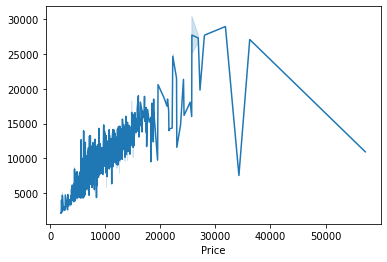

In [48]:
fig3=sns.lineplot(y_test, prediction_data_hpt)
fig3

C:\Users\MSI BRAVO 15\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


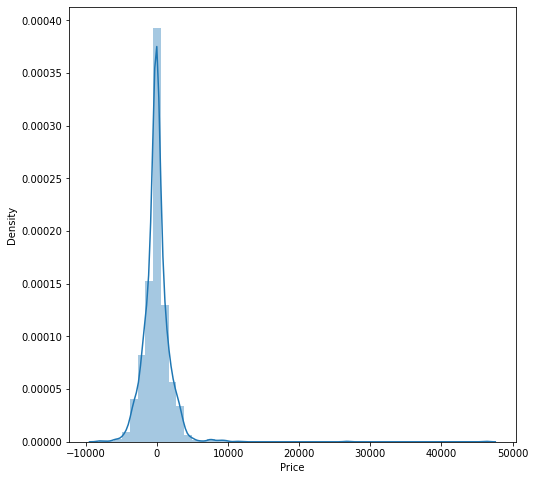

In [49]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction_data_hpt)
plt.show()

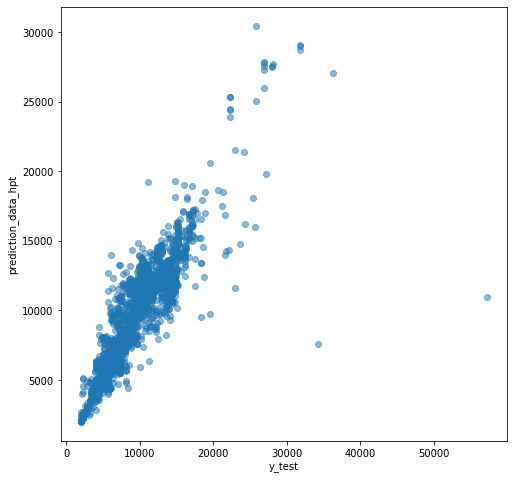

In [50]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction_data_hpt, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("prediction_data_hpt")
plt.show()

In [51]:
print('R2 score: ', metrics.r2_score(y_test,prediction_data_hpt))
print('Mean Absolute Error score:', metrics.mean_absolute_error(y_test, prediction_data_hpt))
print('Mean Squared Error score:', metrics.mean_squared_error(y_test, prediction_data_hpt))
print('Root Mean Squared Error score:', np.sqrt(metrics.mean_squared_error(y_test, prediction_data_hpt)))

errors = abs(prediction_data_hpt - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

R2 score:  0.8012311952490186
Mean Absolute Error score: 1169.7400631774465
Mean Squared Error score: 4206736.236677866
Root Mean Squared Error score: 2051.032968208426
Accuracy: 87.12 %.


In [56]:
def predict_price(airline, source, destination, stops, journeyday, journeymonth, dephour, depmin, arrhour, arrmin, durhour, durmin):
    
    X = flight_data2.drop('Price',axis='columns')

    airline_index = np.where(X.columns==airline)[0][0]
    source_index = np.where(X.columns==source)[0][0]
    destination_index = np.where(X.columns==destination)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = stops
    x[1] = journeyday
    x[2] = journeymonth
    x[3] = dephour
    x[4] = depmin
    x[5] = arrhour
    x[6] = arrmin
    x[7] = durhour
    x[8] = durmin
    
    if airline_index >= 0:
        x[airline_index] = 1
        
    if source_index >= 0:
        x[source_index] = 1
            
    if destination_index >= 0:
        x[destination_index] = 1
        
            
#     actual_predicted_df = pd.DataFrame({'Actual fare':y_test, 'Predicted fare':prediction_data_hpt})

    pred = random_search.predict([x])[0]
        
    df_new = flight_data2[flight_data2[airline] == 1]
    
    lowest_price = df_new['Price'].min()
    
    recommendation_message = ""
    message1 = "BUY"
    message2 = "WAIT"
    
    if pred > df_new["Price"].mean() :
        recommendation_message = message1

    else:
        recommendation_message = message2

        
    return [pred, lowest_price, recommendation_message]


In [57]:
result2 = predict_price('Airline_IndiGo', 'Source_Delhi', 'Destination_Cochin', 2, 24, 2, 10, 56, 18, 45, 7, 35)
print(result2)

print("The Predicted Fare is --> $" , result2[0])

print("The Lowest Fare is --> $" , result2[1])

print("The Message is --> $" , result2[2])

[7519.716380367171, 2227, 'BUY']
The Predicted Fare is --> $ 7519.716380367171
The Lowest Fare is --> $ 2227
The Message is --> $ BUY


C:\Users\MSI BRAVO 15\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [58]:
import pickle
with open('flight_fare_model.pickle','wb') as f:
    pickle.dump(random_search,f)

In [59]:
import json
columns = {
    'data_columns' : [col for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))